The model has been trained we can get the image descriptions with this file in which  which will load the model and generate predictions. 
The predictions contain the max length of 
index values so we will use the same tokenizer.p pickle file to get the words from their index values.

In [17]:
#import necessary packages
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import argparse

In [18]:
#import deep learning packages
from keras.applications.xception import Xception
from keras.applications.xception import Xception, preprocess_input
from keras.preprocessing.image import load_img, img_to_array
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers.merge import add
from keras.models import Model, load_model
from keras.layers import Input, Dense, LSTM, Embedding, Dropout
from tensorflow.keras.utils import to_categorical
from pickle import dump, load
from keras import models

In [4]:
#define our input image photo for which we have to generate description
img_path ='C:\\Users\\Dilip Nikhil F\\Desktop\\FLICKERR\Flicker 8k Data\\Flicker8k_Dataset\\136552115_6dc3e7231c.jpg'
img = '136552115_6dc3e7231c.jpg'

In [6]:
#extract the features of our input image using transer learning
def extract_features(filename, model):
        try:
            image = Image.open(filename)
        except:
            print("ERROR: Couldn't open image! Make sure the image path and extension is correct")
        image = image.resize((299,299))
        image = np.array(image)
        # for images that has 4 channels, we convert them into 3 channels
        if image.shape[2] == 4: 
            image = image[..., :3]
        image = np.expand_dims(image, axis=0)
        image = image/127.5
        image = image - 1.0
        feature = model.predict(image)
        return feature
    
def word_for_id(integer, tokenizer):
    for word, index in tokenizer.word_index.items():
     if index == integer:
         return word
    return None

# method to generate description
def generate_desc(model, tokenizer, photo, max_length):
    in_text = 'start'  # seed with start
    for i in range(max_length):
        sequence = tokenizer.texts_to_sequences([in_text])[0]
        sequence = pad_sequences([sequence], maxlen=max_length)
        pred = model.predict([photo,sequence], verbose=0)
        pred = np.argmax(pred)
        word = word_for_id(pred, tokenizer)
        if word is None:
            break
        in_text += ' ' + word
        if word == 'end':   #end the description
            break
    return in_text

In [8]:
#defining model parameters
max_length = 32
tokenizer = load(open("tokenizer.p","rb"))
model = models.load_model('model_9.h5')
all_features = load(open("features.p","rb"))




start man in red shirt riding bike down dirt hill end


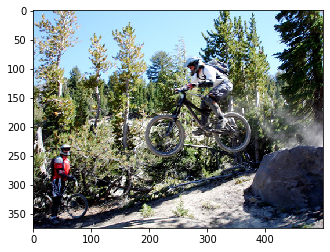

In [9]:
#generate the description
photo = all_features['136552115_6dc3e7231c.jpg']
img = Image.open(img_path)
description = generate_desc(model, tokenizer, photo, max_length)
print("\n\n")
print(description)
plt.imshow(img)